In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,26 mins 55 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,5 months and 17 days !!!
H2O_cluster_name:,H2O_from_python_sih13_b0ep7n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.38 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [3]:
path = "https://s3.amazonaws.com/h2o-public-test-data/bigdata/laptop/airlines_all.05p.csv"

airlines = h2o.import_file(path = path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
airlines.head()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1988,1,9,6,1348,1331,1458,1435,PI,942,nan,70,64,nan,23,17,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,29,5,1339,1331,1442,1435,PI,942,nan,63,64,nan,7,8,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,23,6,950,950,1041,1050,PI,943,nan,51,60,nan,-9,0,LGA,SYR,198,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO
1988,1,18,1,1124,1110,1213,1145,PI,943,nan,49,35,nan,28,14,SYR,BUF,134,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,10,7,1503,1500,1602,1550,PI,944,nan,59,50,nan,12,3,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,30,6,1500,1500,1558,1550,PI,944,nan,58,50,nan,8,0,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO
1988,1,20,3,1750,1705,1900,1810,PI,944,nan,70,65,nan,50,45,SYR,BOS,264,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,10,7,1616,1610,1632,1630,PI,944,nan,16,20,nan,2,6,UCA,SYR,37,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,30,6,1610,1610,1627,1630,PI,944,nan,17,20,nan,-3,0,UCA,SYR,37,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO
1988,1,22,5,2026,2031,2135,2142,PI,945,nan,69,71,nan,-7,-5,SYR,DCA,298,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO


In [5]:
airlines.describe

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1988,1,9,6,1348,1331,1458,1435,PI,942,nan,70,64,nan,23,17,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,29,5,1339,1331,1442,1435,PI,942,nan,63,64,nan,7,8,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,23,6,950,950,1041,1050,PI,943,nan,51,60,nan,-9,0,LGA,SYR,198,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO
1988,1,18,1,1124,1110,1213,1145,PI,943,nan,49,35,nan,28,14,SYR,BUF,134,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,10,7,1503,1500,1602,1550,PI,944,nan,59,50,nan,12,3,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,30,6,1500,1500,1558,1550,PI,944,nan,58,50,nan,8,0,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO
1988,1,20,3,1750,1705,1900,1810,PI,944,nan,70,65,nan,50,45,SYR,BOS,264,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,10,7,1616,1610,1632,1630,PI,944,nan,16,20,nan,2,6,UCA,SYR,37,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES
1988,1,30,6,1610,1610,1627,1630,PI,944,nan,17,20,nan,-3,0,UCA,SYR,37,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO
1988,1,22,5,2026,2031,2135,2142,PI,945,nan,69,71,nan,-7,-5,SYR,DCA,298,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO


<bound method H2OFrame.describe of >

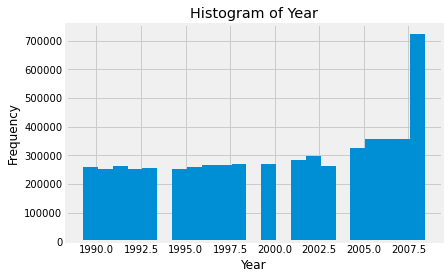

In [6]:
%matplotlib inline
airlines["Year"].hist()

Interestingly, the histogram shows that we do not have data for some years. This is the power that EDA brings to analysis. It helps to quickly pinpoint anomalies in datasets like missing values, outliers, etc.

In [18]:
import pandas as pd

In [19]:
# Convert H2O Frame into Pandas dataframe for plotting with matplotlib

#airlines_pd = airlines.as_data_frame()
#plt.scatter(airlines_pd.DepTime, airlines_pd.ArrTime)
#plt.xlabel("Departure Time")
#plt.ylabel("Arrival Time")

Text(0, 0.5, 'Arrival Time')

Let’s now reduce the size of the data to 1000 data points. We will first create an aggregated frame with around 1000 records and then create a new dataframe using this aggregated frame.

In [7]:
from h2o.estimators.aggregator import H2OAggregatorEstimator

# Build an aggregated frame with around 1000 records
agg_frame = H2OAggregatorEstimator(target_num_exemplars=1000)
agg_frame.train(training_frame=airlines)

# Use the aggregated model to create a new dataframe using aggregated_frame
small_airlines_data = agg_frame.aggregated_frame


aggregator Model Build progress: |████████████████████████████████████████| 100%


In [8]:
small_airlines_data.dim

[979, 32]

In [9]:
small_airlines_data.head()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed,counts
1988,1,9,6,1348,1331,1458,1435,PI,942,nan,70,64,nan,23,17,SYR,BWI,273,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES,182671
1988,1,23,6,950,950,1041,1050,PI,943,nan,51,60,nan,-9,0,LGA,SYR,198,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO,446523
1988,1,18,1,1124,1110,1213,1145,PI,943,nan,49,35,nan,28,14,SYR,BUF,134,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES,158937
1988,1,30,6,1500,1500,1558,1550,PI,944,nan,58,50,nan,8,0,JFK,UCA,191,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO,64481
1988,1,22,5,2026,2031,2135,2142,PI,945,nan,69,71,nan,-7,-5,SYR,DCA,298,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,NO,146665
1988,1,15,5,1917,1910,2015,2016,PI,948,nan,58,66,nan,-1,7,CHO,LGA,305,nan,nan,0,nan,0,nan,nan,nan,nan,nan,NO,YES,124703
1988,1,25,1,1409,1410,1600,1530,PI,948,nan,111,80,nan,30,-1,EWR,ROA,389,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO,151855
1988,1,18,1,nan,1826,nan,1851,PI,948,nan,nan,25,nan,nan,nan,LYH,CHO,70,nan,nan,1,nan,0,nan,nan,nan,nan,nan,YES,YES,15569
1988,1,13,3,2106,2052,2156,2152,PI,950,nan,50,60,nan,4,14,BWI,BGM,212,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,YES,86088
1988,1,6,3,1710,1710,1832,1825,PI,953,nan,82,75,nan,7,0,JFK,BUF,301,nan,nan,0,nan,0,nan,nan,nan,nan,nan,YES,NO,116026


As mentioned above, a new count column is created. Aggregator maintains outliers as outliers but lumps together dense clusters into exemplars with an attached count column showing the member points.

# Visualizing the reduced dataframe

Text(0, 0.5, 'ArrTime')

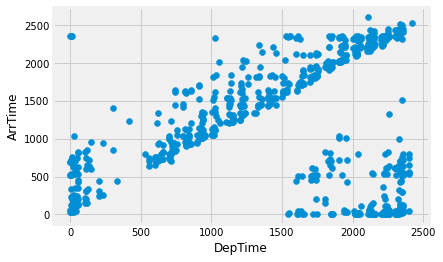

In [10]:
small_airlines_pd = small_airlines_data.as_data_frame(use_pandas=True)
plt.scatter(small_airlines_pd.DepTime, small_airlines_pd.ArrTime)
plt.xlabel("DepTime")
plt.ylabel("ArrTime")

As expected, this step takes much less time and outputs distinct data points, easily discernible by the human eye.

In [11]:
h2o.cluster().shutdown()

H2O session _sid_8c83 closed.
